IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
import seaborn as sns
from sklearn.svm import SVC
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.patches as mpatches

print('Imported')

Imported


READING DATA

In [2]:
data = pd.read_csv('/content/new_dataset.csv', header = 0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(10323, 9)
['Timestamp', 'Sender bank code', 'Sender a/c number', 'Receiver bank code', 'Receiver a/c number', 'Amount Transacted', 'Payment Currency', 'Payment Format', 'Is Laundering']


TRAINING AND TESTING DATA SPLITS

In [3]:
file_path = '/content/new_dataset.csv'
df = pd.read_csv(file_path)
df = df.drop("Timestamp",axis='columns')

# Assuming your target variable is 'Is Laundering', and other features are used for prediction

target_column = 'Is Laundering'
columns_to_drop = ['timestamp']

def convert(a):

  From_Acc_int = int(a,16)

  From_Acc_str = str(From_Acc_int)
  return(From_Acc_str)

# Check if columns exist before dropping
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
X = df.drop([target_column] + columns_to_drop, axis=1)

X['Sender a/c number'] = X['Sender a/c number'].apply(convert)
X['Receiver a/c number'] = X['Receiver a/c number'].apply(convert)
print(X)
y = df[target_column]

# Label encode the target variable if needed
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical variables if any
X = pd.get_dummies(X, columns=['Payment Currency', 'Payment Format'], drop_first=True)

X_col_list = X.columns.tolist()
print(X_col_list)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
# You can adjust the hyperparameters (e.g., n_estimators, max_depth) based on your dataset

       Sender bank code Sender a/c number  Receiver bank code  \
0                 17321       34424576272                4259   
1                     1       34362197200                   1   
2                 15447       34513081472                2824   
3                318879       34474834448              318879   
4                    20       34361612240                  22   
...                 ...               ...                 ...   
10318            113685       34522225200              113685   
10319             13327       34395113488               15085   
10320                70        4299327144               15863   
10321            215266       34467626368              215266   
10322              1292       34366143232              111764   

      Receiver a/c number  Amount Transacted Payment Currency Payment Format  
0             34424576352            6693.21             Euro            ACH  
1             34362197200               4.26        US Dollar

RANDOM FOREST MODEL

In [4]:
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
print(X_test)
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\n--Random Forest--")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

      Sender bank code Sender a/c number  Receiver bank code  \
7278              1292       34363857264                 410   
1692             11838       34433410096               28255   
2692            333214       34562403392              333214   
7701                70        4299327144               17854   
321               1522       34362549360                  22   
...                ...               ...                 ...   
9879            220271       34612697360                7042   
4328              8623       34460614624                4503   
5060            232335       34663565152               12797   
6686            214529       34439210688              214529   
8813                70        4299327432              218638   

     Receiver a/c number  Amount Transacted  Payment Currency_Bitcoin  \
7278         34369756272            4996.37                     False   
1692         34560961904         6467426.25                     False   
2692        

LOGISTIC REGRESSION MODEL

In [5]:
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model
logistic_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_reg_model.predict(X_test)

# Evaluate the model
print('--Logistic regression model--')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--Logistic regression model--
Confusion Matrix:
[[891 202]
 [678 294]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1093
           1       0.59      0.30      0.40       972

    accuracy                           0.57      2065
   macro avg       0.58      0.56      0.53      2065
weighted avg       0.58      0.57      0.54      2065



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC MODEL

In [8]:
SVC_model = SVC(C=1.0, kernel='rbf', random_state=42,probability = True)

# Train the model
SVC_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = SVC_model.predict(X_test)

# Evaluate the model
print('--Support Vector Classifier--')
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--Support Vector Classifier--
Confusion Matrix:
[[1034   59]
 [ 865  107]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.95      0.69      1093
           1       0.64      0.11      0.19       972

    accuracy                           0.55      2065
   macro avg       0.59      0.53      0.44      2065
weighted avg       0.59      0.55      0.45      2065



WORKING MODEL WITH OUTPUT

In [6]:
recv_curr_dict = {'Bitcoin':1, 'Brazil Real':2,
                  'Canadian Dollar':3, 'Euro':4,
                  'Mexican Peso':5, 'Ruble':6, 'Rupee':7,
                  'Saudi Riyal':8, 'Shekel':9, 'Swiss Franc':10,
                  'UK Pound':11, 'US Dollar':12, 'Yen':13,
                  'Yuan':14}
payment_method_dict = {"ACH":1,"Bitcoin":2,"Cash":3,"Cheque":4,"Credit Card":5,"Reinvestment":6}
#user input////////////////////////////
from_bank = input("Enter Sender's bank code: ")

Acc = input("Enter Sender's account number: ")
From_Acc_int = int(Acc,16)
From_Acc_str = str(From_Acc_int)

TO_bank = input("Enter Receiver's bank code: ")

Acc_1 = input("Enter Receiver's account number: ")
To_Acc_int = int(Acc_1,16)
To_Acc_str = str(To_Acc_int)

Amount_Received = input("Enter Amount transacted: ")

recv_curr_inp = input("Enter Payment currency: ")
recv_iterator_dict = recv_curr_dict[recv_curr_inp]
recv_iterator_list = 4 + recv_iterator_dict

paym_meth_inp = input("Enter Payment Format: ")
paym_meth_iterator_dict = payment_method_dict[paym_meth_inp]
paym_meth_iterator_list = 33 + paym_meth_iterator_dict

list1 = [from_bank,From_Acc_str ,TO_bank,To_Acc_str,Amount_Received,'','','','','','','','','','','','','','','','','','','','']

for i in range(5,19):
  if(i == recv_iterator_list):
    list1[i] = '1'
  else:
    list1[i] = '0'

for i in range(19,25):
  if(i == paym_meth_iterator_list):
    list1[i] = '1'
  else:
    list1[i] = '0'

data_1 = [list1]
data_1 = pd.DataFrame(data_1)

pred = model.predict(data_1)
print(pred[0])

if(pred[0] == 0):
  print("Not laundered")
else:
  print("Laundered")

Enter Sender's bank code: 17321
Enter Sender's account number: 803DD5910
Enter Receiver's bank code: 4259
Enter Receiver's account number: 803DD5960
Enter Amount transacted: 6693.21
Enter Payment currency: Euro
Enter Payment Format: ACH
1
Laundered


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


AUC & ROC CURVE

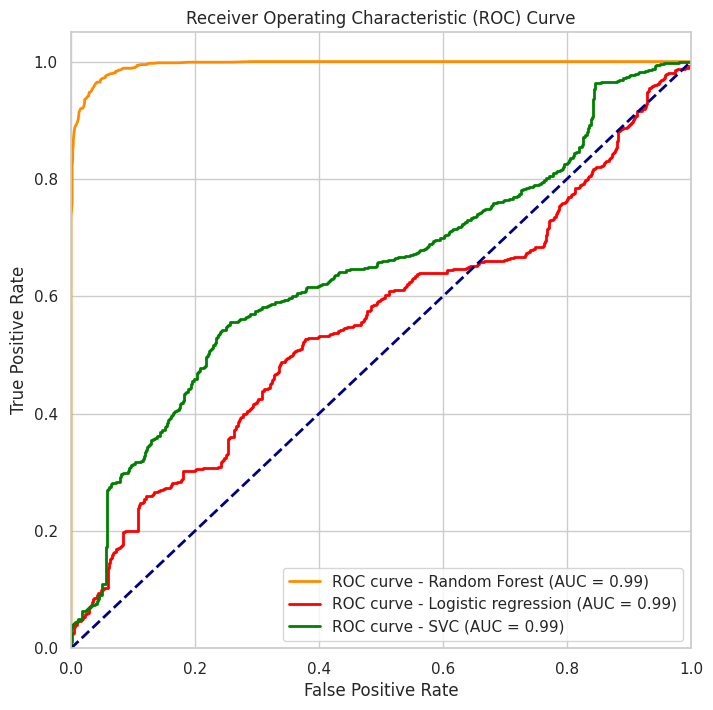

In [9]:
y_probabilities = model.predict_proba(X_test)[:, 1]
log_y_probabilities = logistic_reg_model.predict_proba(X_test)[:, 1]

#Random Forest algorithm roc,auc

fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = auc(fpr, tpr)

#Logistic Regression algorithm roc,auc

log_fpr, log_tpr, log_thresholds = roc_curve(y_test, log_y_probabilities)
log_roc_auc = auc(log_fpr, log_tpr)

#SVC algorithm ROC,AUC
SVC_y_probabilities = SVC_model.predict_proba(X_test)[:, 1]
SVC_fpr, SVC_tpr, SVC_thresholds = roc_curve(y_test, SVC_y_probabilities)
SVC_roc_auc = auc(SVC_fpr, SVC_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve - Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot(log_fpr, log_tpr, color='red', lw=2, label='ROC curve - Logistic regression (AUC = {:.2f})'.format(roc_auc))
plt.plot(SVC_fpr, SVC_tpr, color='green', lw=2, label='ROC curve - SVC (AUC = {:.2f})'.format(roc_auc)) #(Uncomment these after running SVC model)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

PIE CHART

Index(['US Dollar', 'Euro', 'Ruble', 'UK Pound', 'Rupee', 'Saudi Riyal',
       'Swiss Franc', 'Yuan', 'Yen', 'Canadian Dollar', 'Australian Dollar',
       'Shekel', 'Mexican Peso', 'Brazil Real', 'Bitcoin'],
      dtype='object', name='Payment Currency')
['US Dollar (59.0%)', 'Euro (12.9%)', 'Ruble (6.5%)', 'UK Pound (4.1%)', 'Rupee (3.9%)', 'Saudi Riyal (3.6%)', 'Swiss Franc (1.9%)', 'Yuan (1.7%)', 'Yen (1.3%)', 'Canadian Dollar (1.2%)', 'Australian Dollar (1.2%)', 'Shekel (0.9%)', 'Mexican Peso (0.7%)', 'Brazil Real (0.6%)', 'Bitcoin (0.5%)']


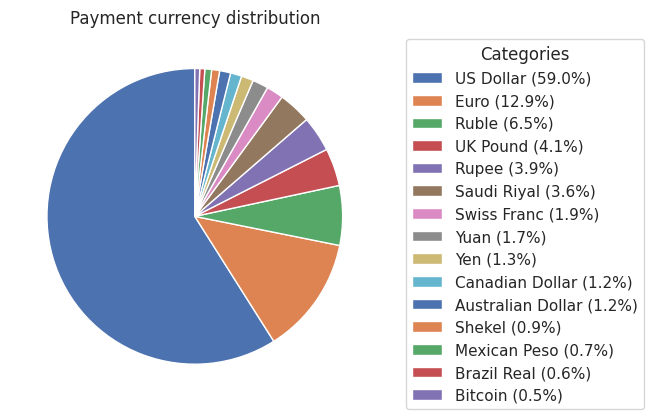

In [ ]:
category_counts = df['Payment Currency'].value_counts()
print(category_counts.index)
# Plot a pie chart


wedges, texts, autotexts = plt.pie(category_counts, autopct='', startangle=90)

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(category_counts.index, category_counts / category_counts.sum() * 100)]
print(legend_labels)
egend_handles = [mpatches.Patch(color=wedge.get_facecolor(), label=label) for wedge, label in zip(wedges, legend_labels)]

# Add a legend
plt.legend(wedges, legend_labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')


# Add a title
plt.title('Payment currency distribution')

# Show the plot
plt.show()